<a href="https://colab.research.google.com/github/lucia1970-student/GA-PyTorch/blob/main/svc_cv_roc_all_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet

/content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet


In [ ]:
#Autism prognosis using voice biomarkers.

#Dataset from study below.  Available on request.
# https://www.nature.com/articles/s41398-023-02554-8#Fig2

#I am proposing ALL characteristics of voice biomarkers (19) and 2 target
#classes (TD and ASD) in order to classify subject's prognosis.
#The purpose of this iteration is to validate the study results.
#The study entailed the following steps:

#1. Selecting ALL characteristicss and 2 classes ('ASD' and 'TD') as per study's
#identified characteristics and classes.  The 19 characteristics have been ranked
# with Recursive Feature Elimination (RFE).  No characteristics were eliminated.

#3. Split dataset into train/test (80%/20%). Filtered dataset was left with 49 out
#of 108 once relevant target classes were extracted.

#4. Apply SVC classification with cross-validation (400 iterations)
#using ROC scoring.

#5. Display means scoring, 'classification_report' and 'accuracy_score'.

#6. Display 'confusion_matrix'

#Load data.
import pandas as pd
df=pd.read_csv("voice_data.csv")
data=df
display(df)
df.columns


,Group,avg_f0,avg_F1,avg_F2,avg_F3,avg_F4,mean_hnr,jitter,shimmer,dispersion_formantique,avg_f0_k,mean_hnr_k,jitter_k,shimmer_k,dispersion_formantique_k,avg_f0_s,mean_hnr_s,jitter_s,shimmer_s,dispersion_formantique_s
0,ASD,304.75,778.00,2245.60,3571.05,5081.95,10.75,1.958567,1.377360,1434.650000,4.120596,6.512729,4.430703,2.066858,5.193159,1.026296,1.519206,1.205160,-0.259522,0.069057
1,ASD,294.45,662.70,1939.90,3251.25,4775.30,12.25,1.663247,1.389308,1370.866667,2.278845,3.440682,3.091686,3.108758,2.927942,0.133170,0.667077,0.560049,-0.244830,-0.390032
2,ASD,255.85,884.55,2183.50,3513.75,5111.40,12.90,1.422039,1.185426,1408.950000,1.737850,5.391922,2.999970,3.019235,2.481138,0.169958,1.548892,0.722608,-0.348192,0.175821
3,ASD,292.75,652.05,2022.60,3177.75,4634.10,8.65,1.729150,1.645441,1327.350000,8.688811,2.620909,2.320086,2.652073,2.249446,-2.098723,-0.134290,0.045519,0.452664,0.225971
4,ASD,305.75,739.75,2294.25,3706.60,4807.55,8.30,2.033454,1.544171,1355.933333,3.761873,3.485672,3.841500,7.036189,3.318189,0.993320,0.670789,1.151768,-1.606129,-0.338201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,TD,255.05,858.95,2223.80,3384.55,4787.25,9.75,1.111741,1.302515,1309.433333,5.190369,3.365465,1.875519,3.242620,1.881098,1.338850,0.806779,0.273689,-0.246472,0.152368
104,TD,265.00,1022.95,2350.50,3596.25,4973.85,9.80,2.340409,1.299065,1316.966667,3.619754,6.548035,8.302562,2.789693,4.012588,1.028263,1.752227,2.363517,0.612808,0.451664
105,TD,266.45,762.45,2278.70,3557.60,4742.95,10.95,1.489093,1.517415,1326.833333,2.151113,2.531716,3.208905,2.385634,3.771958,0.114164,0.130736,0.951328,-0.507807,1.004282
106,TD,274.95,873.00,2299.70,3672.65,4917.65,9.35,1.391963,1.264749,1348.216667,3.473041,2.755562,2.825725,2.361107,2.442094,-0.777756,0.412494,0.655506,0.554750,-0.074498


Index(['Group', 'avg_f0', 'avg_F1', 'avg_F2', 'avg_F3', 'avg_F4', 'mean_hnr',
       'jitter', 'shimmer', 'dispersion_formantique', 'avg_f0_k', 'mean_hnr_k',
       'jitter_k', 'shimmer_k', 'dispersion_formantique_k', 'avg_f0_s',
       'mean_hnr_s', 'jitter_s', 'shimmer_s', 'dispersion_formantique_s'],
      dtype='object')

Study #1 - Dataset loading and selection of features (19) and target class (1).

In [ ]:

# Ensure y and X are created from the same filtered DataFrame
filtered_data = data.loc[(data.Group == 'ASD') | (data.Group == 'TD')]

y = filtered_data.iloc[:,0]
#print(y)

#All characteristics
X = filtered_data.iloc[:,1:]  # Assuming characteristics start from the third column

#y=data.loc[(data.Group == 'ASD') | (data.Group == 'TD')]
#y=y.iloc[:,1]
#print(y)
#print(data)

#4 characteristics
#X=data.loc[:,['avg_F1','mean_hnr','jitter_s','shimmer']]
#X=filtered_data.loc[:,['avg_F1','mean_hnr','jitter_s','shimmer']]

#Best fit characteristics
#X=data.loc[:,['avg_f0','avg_F1','mean_hnr','jitter','shimmer','avg_f0_k','jitter_k','avg_f0_s','jitter_s']]

#As per article characteristics
#X=filtered_data.loc[:,['avg_f0','avg_F1','avg_F2','avg_F3','avg_F4','jitter_s','shimmer','mean_hnr','dispersion_formantique']]

#print("Target classes: ",y.unique())
print(X.count())
print(y.count())
print(X)
print(y)


avg_f0                      62
avg_F1                      62
avg_F2                      62
avg_F3                      62
avg_F4                      62
mean_hnr                    62
jitter                      62
shimmer                     62
dispersion_formantique      62
avg_f0_k                    62
mean_hnr_k                  62
jitter_k                    62
shimmer_k                   62
dispersion_formantique_k    62
avg_f0_s                    62
mean_hnr_s                  62
jitter_s                    62
shimmer_s                   62
dispersion_formantique_s    62
dtype: int64
62
     avg_f0   avg_F1   avg_F2   avg_F3   avg_F4  mean_hnr    jitter   shimmer  \
0    304.75   778.00  2245.60  3571.05  5081.95     10.75  1.958567  1.377360   
1    294.45   662.70  1939.90  3251.25  4775.30     12.25  1.663247  1.389308   
2    255.85   884.55  2183.50  3513.75  5111.40     12.90  1.422039  1.185426   
3    292.75   652.05  2022.60  3177.75  4634.10      8.65  1.729150  1.

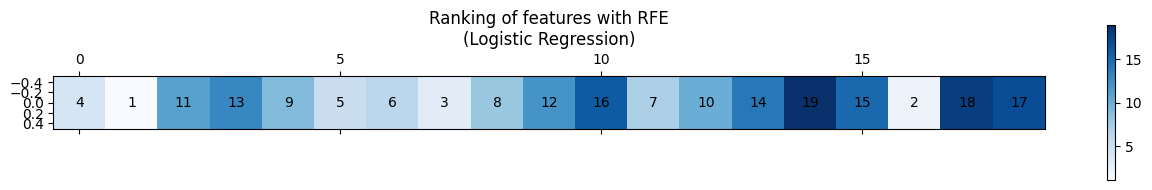

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("rfe", RFE(estimator=LogisticRegression(), n_features_to_select=1, step=1)),
    ]
)

pipe.fit(X, y)
ranking = pipe.named_steps["rfe"].ranking_
ranking = ranking.reshape(1, -1)  # Reshape to a 2D array

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)

# Add annotations for pixel numbers
for i in range(ranking.shape[0]):
    for j in range(ranking.shape[1]):
        plt.text(j, i, str(ranking[i, j]), ha="center", va="center", color="black")

plt.colorbar()
plt.title("Ranking of features with RFE\n(Logistic Regression)")
plt.show()

In [ ]:
#Normalizing X with Standard scaling and encode target class (y)
#with LabelEncoder.
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = StandardScaler().fit(X).transform(X)

le = LabelEncoder()
y = le.fit_transform(y)
#y_ = y.reshape(-1, 1)
#y = preprocessing.StandardScaler().fit().transform(y)
#y = preprocessing.normalize(y_)
print(len(X), X)
print(len(y), y)

62 [[ 0.4806414  -0.46195276 -0.12833228 ...  0.2397354  -0.65368823
  -0.13223174]
 [ 0.24976577 -1.23611743 -2.20511944 ... -0.54582043 -0.63369258
  -1.05228027]
 [-0.61545743  0.25346133 -0.55021152 ... -0.34787083 -0.77436497
   0.08173179]
 ...
 [-0.37785728 -0.56636092  0.0965341  ... -0.06935652 -0.99159638
   1.74203031]
 [-0.18732885  0.17591058  0.23919858 ... -0.42958108  0.45451336
  -0.41992685]
 [-2.99370048  1.71718985  1.69709366 ... -0.48468905 -0.28452303
  -0.14167364]]
62 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#Utilisation de SVC Cross-Validation (CV) avec ROC scoring.
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, classification_report
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
rs = ShuffleSplit(n_splits=400, train_size=0.8, test_size=0.2, random_state=49)

#Creation du SVC au lieu de KMeans++
model = SVC(kernel="linear", probability=True, random_state=49)
scores = cross_val_score(model, X_train, y_train, cv=rs, verbose=5, scoring='roc_auc') #, scoring="r2")#scoring='neg_mean_squared_error')
scores = scores[~np.isnan(scores)]
print("\nMeans SVC classification with cross-validation and ROC scoring: ", np.mean(scores))

y_pred = model.fit(X_train, y_train).predict(X_train)
print("\nAccuracy Score: ", accuracy_score(y_train, y_pred))
print("\nClassification Report: \n", classification_report(y_train, y_pred))



[CV] END ................................ score: (test=0.840) total time=   0.0s
[CV] END ................................ score: (test=0.833) total time=   0.0s
[CV] END ................................ score: (test=0.857) total time=   0.0s
[CV] END ................................ score: (test=0.917) total time=   0.0s
[CV] END ................................ score: (test=0.880) total time=   0.0s
[CV] END ................................ score: (test=0.905) total time=   0.0s
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.680) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] END ................................ score: (test=0.833) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.875) total time=   0.0s
[CV] END ................................ score: (test=0.875) total time=   0.0s
[CV] END ................................ score: (test=0.960) total time=   0.0s
[CV] END ................................ score: (test=0.810) total time=   0.0s
[CV] END ................................ score: (test=0.833) total time=   0.0s
[CV] END ................................ score: (test=0.583) total time=   0.0s
[CV] END ................................ score: (test=0.833) total time=   0.0s
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.762) total time=   0.0s
[CV] END ................................ score: (test=0.840) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.7s


[CV] END ................................ score: (test=0.667) total time=   0.0s
[CV] END ................................ score: (test=0.840) total time=   0.0s
[CV] END ................................ score: (test=0.800) total time=   0.0s
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.920) total time=   0.0s
[CV] END ................................ score: (test=0.792) total time=   0.0s
[CV] END ................................ score: (test=0.600) total time=   0.0s
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.875) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.7s


[CV] END ................................ score: (test=0.960) total time=   0.0s
[CV] END ................................ score: (test=0.812) total time=   0.0s
[CV] END ................................ score: (test=0.952) total time=   0.0s
[CV] END ................................ score: (test=0.952) total time=   0.0s
[CV] END ................................ score: (test=0.880) total time=   0.0s
[CV] END ................................ score: (test=0.917) total time=   0.0s
[CV] END ................................ score: (test=0.833) total time=   0.0s
[CV] END ................................ score: (test=0.778) total time=   0.0s
[CV] END ................................ score: (test=0.952) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    3.0s


[CV] END ................................ score: (test=0.857) total time=   0.0s
[CV] END ................................ score: (test=0.875) total time=   0.0s
[CV] END ................................ score: (test=0.762) total time=   0.0s
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.905) total time=   0.0s
[CV] END ................................ score: (test=0.952) total time=   0.0s
[CV] END ................................ score: (test=0.875) total time=   0.0s
[CV] END ................................ score: (test=0.880) total time=   0.0s
[CV] END ................................ score: (test=0.810) total time=   0.0s
[CV] END ................................ score: (test=0.583) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.792) total time=   0.0s
[CV] END ...................

[[27  1]
 [ 0 21]]
2
2


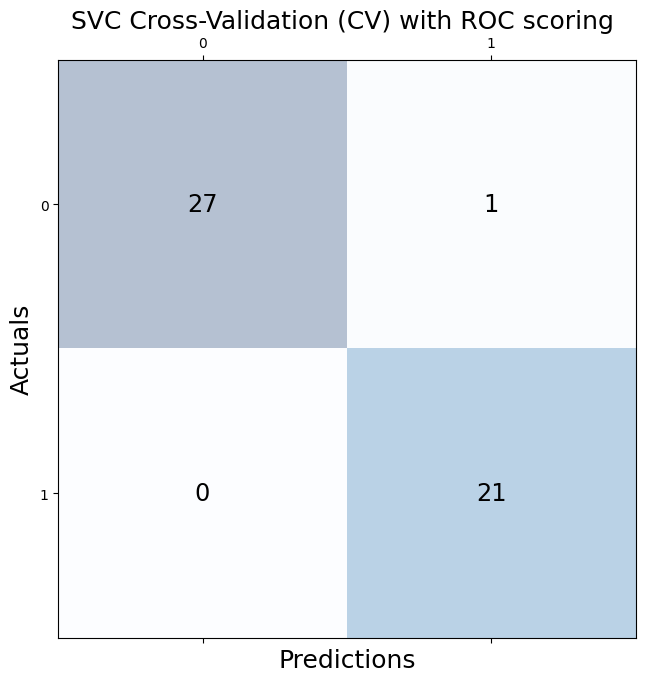

In [ ]:
# Displaying SVC confusion matrix for 2 classes (Groups - ASD and TD)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm=confusion_matrix(y_train, y_pred)
#print(X_test)
print(cm)
print(cm.shape[0])
print(cm.shape[1])
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('SVC Cross-Validation (CV) with ROC scoring ', fontsize=18)
plt.show()
